In [499]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
seed = 18
random.seed(seed)

In [500]:
n = 2068
e = 5163

In [501]:
random_network = nx.gnm_random_graph(n, e, seed= seed)

In [502]:
def create_random_connected_graph(n, e):
    # Start with a tree graph (n-1 edges, and connected)
    G = nx.random_tree(n, seed= seed)
    
    # Add remaining edges
    remaining_edges = e - (n - 1)
    while remaining_edges > 0:
        # Randomly select two nodes
        u, v = random.sample(list(G.nodes()), 2)
        
        # Add an edge between them if it doesn't already exist
        if not G.has_edge(u, v):
            G.add_edge(u, v)
            remaining_edges -= 1
    
    return G

In [503]:
random_network2 = create_random_connected_graph(n, e)

In [504]:
def create_random_connected_graph2(n, e):
    # Step 1: Generate a random graph
    G = nx.gnm_random_graph(n, e, seed= seed)
    
    # Step 2: Ensure connectivity
    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        while len(components) > 1:
            # Sort components by size to preferentially remove edges from larger components
            components = sorted(components, key=len, reverse=True)
            
            # Connect two nodes from different components
            u = random.choice(list(components[0]))
            v = random.choice(list(components[1]))
            G.add_edge(u, v)
            
            # Remove a random edge from the larger component
            u_prime, v_prime = random.choice(list(G.edges(components[0])))
            G.remove_edge(u_prime, v_prime)
            
            components = list(nx.connected_components(G))

    return G

In [505]:
random_network3 = create_random_connected_graph2(n, e)

In [506]:

def create_random_connected_graph3(n, e):
    G = nx.gnm_random_graph(n, e, seed= seed)
    largest_cc_nodes = max(nx.connected_components(G), key=len)
    missing_nodes = set(G.nodes()) - set(largest_cc_nodes)
    
    new_random_network = G.copy()
    
    # Calculate node degrees in the original graph
    degrees = dict(new_random_network.degree())
    
    for node in missing_nodes:
        # Choose a node to connect to from the largest connected component based on its degree
        target = random.choices(list(largest_cc_nodes), weights=[degrees[node] for node in largest_cc_nodes])[0]
        
        new_random_network.add_edge(node, target)
        
        # Update the degree dictionary and the set of largest_cc_nodes
        degrees[node] = 1
        degrees[target] += 1
        largest_cc_nodes.add(node)

    # Remove excess edges to retain the original number of edges
    while new_random_network.number_of_edges() > e:
        edge_to_remove = random.choice(list(new_random_network.edges()))
        new_random_network.remove_edge(*edge_to_remove)

    return new_random_network


In [507]:
random_network4 = create_random_connected_graph3(n, e)

In [508]:
def plot_degree_distribution(graphs, graph_names):
    colors = ["red", "green", "blue", "black"]
    markers = ['o', 's', '^', 'H']
    facecolors = ['none', 'none', 'none', 'none']
    
    # Linear scale plot
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)  # first subplot
    plt.title("Linear-Linear Scale")
    plt.xlabel("Degree $k$")
    plt.ylabel("Probability $P(X=k)$")

    for i, G in enumerate(graphs):
        N_k = nx.degree_histogram(G)[1:]
        pk = [i/sum(N_k) for i in N_k]  # normalized so they sum to 1
        k = list(range(1, len(N_k) + 1))
        plt.scatter(k, pk, edgecolors=colors[i], label=graph_names[i], marker=markers[i], facecolors=facecolors[i])

        # Fitting a line of best fit using polyfit
        # coeffs = np.polyfit(k, pk, 7)
        # p = np.poly1d(coeffs)
        # plt.plot(k, p(k), color=colors[i], linestyle="--", label=f"Fit for {graph_names[i]}")
    
    plt.legend(loc='upper right')
    
    # Log-log scale plot
    plt.title("Linear-Linear")
    plt.xlabel("Degree $k$")
    plt.ylabel("Probability $P(X=k)$")
    plt.show()

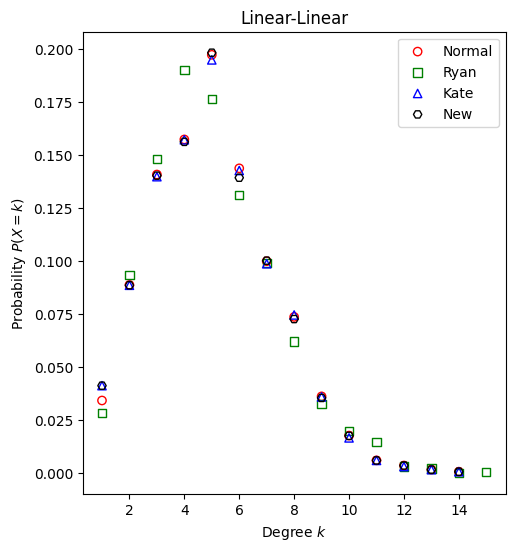

In [509]:
plot_degree_distribution([random_network, random_network2, random_network3, random_network4], ["Normal", "Ryan", "Kate", "New"])